# A "Hello world" in Keras

[Keras: Theano-based Deep Learning library](http://keras.io/)

This is just a minimal and very brief example of using Keras to provide a simple working setup that can be modified for more complex tasks.

This model's task is rather trivial - to classify a few almost linearly separable 2D gaussian blobs.

The setup is very similar to the previous Theanets "Hello world" `theanets/theanets_hello_world.py`.

In [1]:
%pylab inline

from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

from sklearn.cross_validation import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import classification_report, confusion_matrix

Populating the interactive namespace from numpy and matplotlib


## Generate data

We generate a very simple dataset: three almost linearly separable gaussian blobs in 2D.

In [36]:
n_samples = 10000
n_classes = 3
n_features = 2

# centers - number of classes
# n_features - dimension of the data
X, y_int = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, \
    cluster_std=0.5, random_state=0)

# No need to convert the features and targets to the 32-bit format as in plain theano.

# labels need to be one-hot encoded (binary vector of size N for N classes)
y = np_utils.to_categorical(y_int, n_classes)

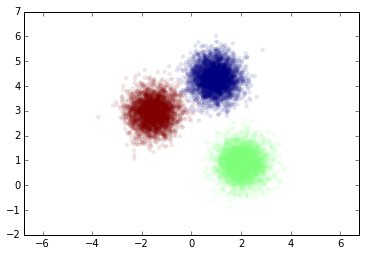

In [37]:
# visualize the data for better understanding
def plot_2d_blobs(dataset):
    X, y = dataset
    axis('equal')
    scatter(X[:, 0], X[:, 1], c=y, alpha=0.1, edgecolors='none')

plot_2d_blobs((X, y_int))

In [38]:
# split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000, 3), (2000, 3))

In [40]:
# create and train the model
# plain neural network with a single hidden layer

model = Sequential()
model.add(Dense(3, input_dim=n_features))
model.add(Activation("tanh"))
model.add(Dense(n_classes))
# classifier
model.add(Activation("softmax"))

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [43]:
model.fit(X_train, y_train, nb_epoch=5, batch_size=32)

Epoch 1/5
8000/8000 [==============================] - 0s - loss: 0.3364     
Epoch 2/5
8000/8000 [==============================] - 0s - loss: 0.1807     
Epoch 3/5
8000/8000 [==============================] - 0s - loss: 0.1341     
Epoch 4/5
8000/8000 [==============================] - 0s - loss: 0.1084     
Epoch 5/5
8000/8000 [==============================] - 0s - loss: 0.0915     


In [49]:
def evaluate_accuracy(X, y, label):
    _, accuracy = model.evaluate(X_train, y_train, show_accuracy=True)
    print('training accuracy:', 100 * accuracy, '%')

evaluate_accuracy(X_train, X_train, 'training')
evaluate_accuracy(X_test, X_test, 'test')

8000/8000 [==============================] - 0s     
training accuracy: 99.6875 %
8000/8000 [==============================] - 0s     
training accuracy: 99.6875 %


In [50]:
y_test_pred = model.predict_classes(X_test)

2000/2000 [==============================] - 0s     


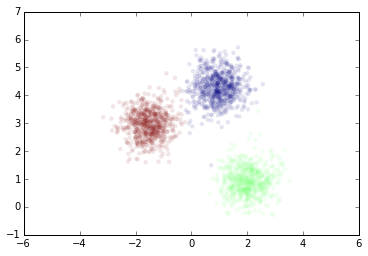

In [51]:
plot_2d_blobs((X_test, y_test_pred))

For more complete documentation and more advanced examples, please visit http://keras.io/.

Happy machine learning!